# Imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Data Loading

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Calling it full because it's before splitting

# Training data
y_train_full = train_data['accident_risk']
X_train_full = train_data.drop('accident_risk', axis=1)

# Testing data
y_test_full = test_data['accident_risk']
X_test_full = test_data.drop('accident_risk', axis=1)

# EDA

In [98]:
X_train_full.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1


In [99]:
X_train_full.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970
std,149462.849975,1.120434,0.272563,15.788521,0.895961
min,0.000000,1.000000,0.000000,25.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000
max,517753.000000,4.000000,1.000000,70.000000,7.000000


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

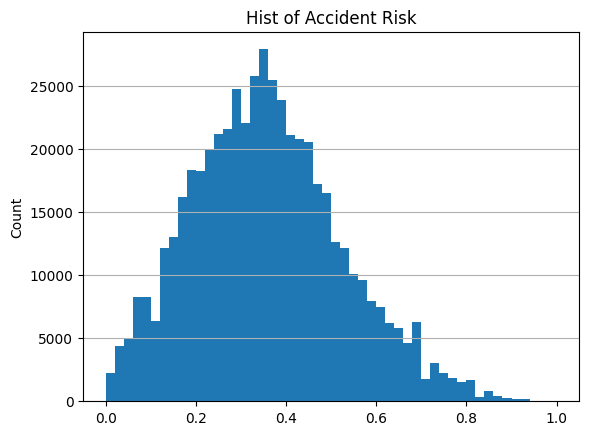

In [101]:
x = y_train_full
plt.hist(x=x, bins = 50)
plt.title("Hist of Accident Risk")
plt.ylabel('Count')
plt.grid(axis = 'y')
plt.show()

# Data Preprocessing

In [102]:
# Checking column dtypes
X_train_full.dtypes

id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
dtype: object

In [107]:
# Make list of all columns that are of Object dtype
obj_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == 'O']

X_train_full[obj_cols] = X_train_full[obj_cols].astype('category')

In [108]:
# Checking column dtypes
X_train_full.dtypes

id                           int64
road_type                 category
num_lanes                    int64
curvature                  float64
speed_limit                  int64
lighting                  category
weather                   category
road_signs_present            bool
public_road                   bool
time_of_day               category
holiday                       bool
school_season                 bool
num_reported_accidents       int64
dtype: object

In [109]:
# Data Split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [115]:
# Load Model

model = XGBRegressor(random_state = 42, enable_categorical = True)

In [116]:
# Fit model
model.fit(X_train, y_train, )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [117]:
y_preds = model.predict(X_val)

RMSE = root_mean_squared_error(y_true=y_val, y_pred=y_preds)
RMSE

0.05640224661731446

# Testing 